In [11]:
import numpy as np
import pandas as pd
from sklearn import datasets
#
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn import metrics

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data',
                names = ["ㅜname", "hair", "feathers", "eggs", 
                         "milk", "airborne", "aquatic",
                        "predator", "toothed", "breathes",
                        "venomous", "fins", "legs", 
                        "tail", "domestic", "catsize", "animal"])
print(df.head())

          ㅜname  hair  feathers  eggs  milk  airborne  aquatic  predator  \
aardvark      1     0         0     1     0         0        1         1   
antelope      1     0         0     1     0         0        0         1   
bass          0     0         1     0     0         1        1         1   
bear          1     0         0     1     0         0        1         1   
boar          1     0         0     1     0         0        1         1   

          toothed  breathes  venomous  fins  legs  tail  domestic  catsize  \
aardvark        1         1         0     0     4     0         0        1   
antelope        1         1         0     0     4     1         0        1   
bass            1         0         0     1     0     1         0        0   
bear            1         1         0     0     4     0         0        1   
boar            1         1         0     0     4     1         0        1   

          animal  
aardvark       1  
antelope       1  
bass           4 

In [2]:
df.shape

(101, 18)

In [3]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
df.iloc[:,-1].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: 17, dtype: int64

In [5]:
x_data = df.iloc[:, 1:-1].values
y_data = df.iloc[:, -1].values

In [6]:
x_data.shape

(101, 16)

In [7]:
y_data.shape

(101,)

/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python2.7/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python2.7/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python2.7/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python2.7/dist-packages/

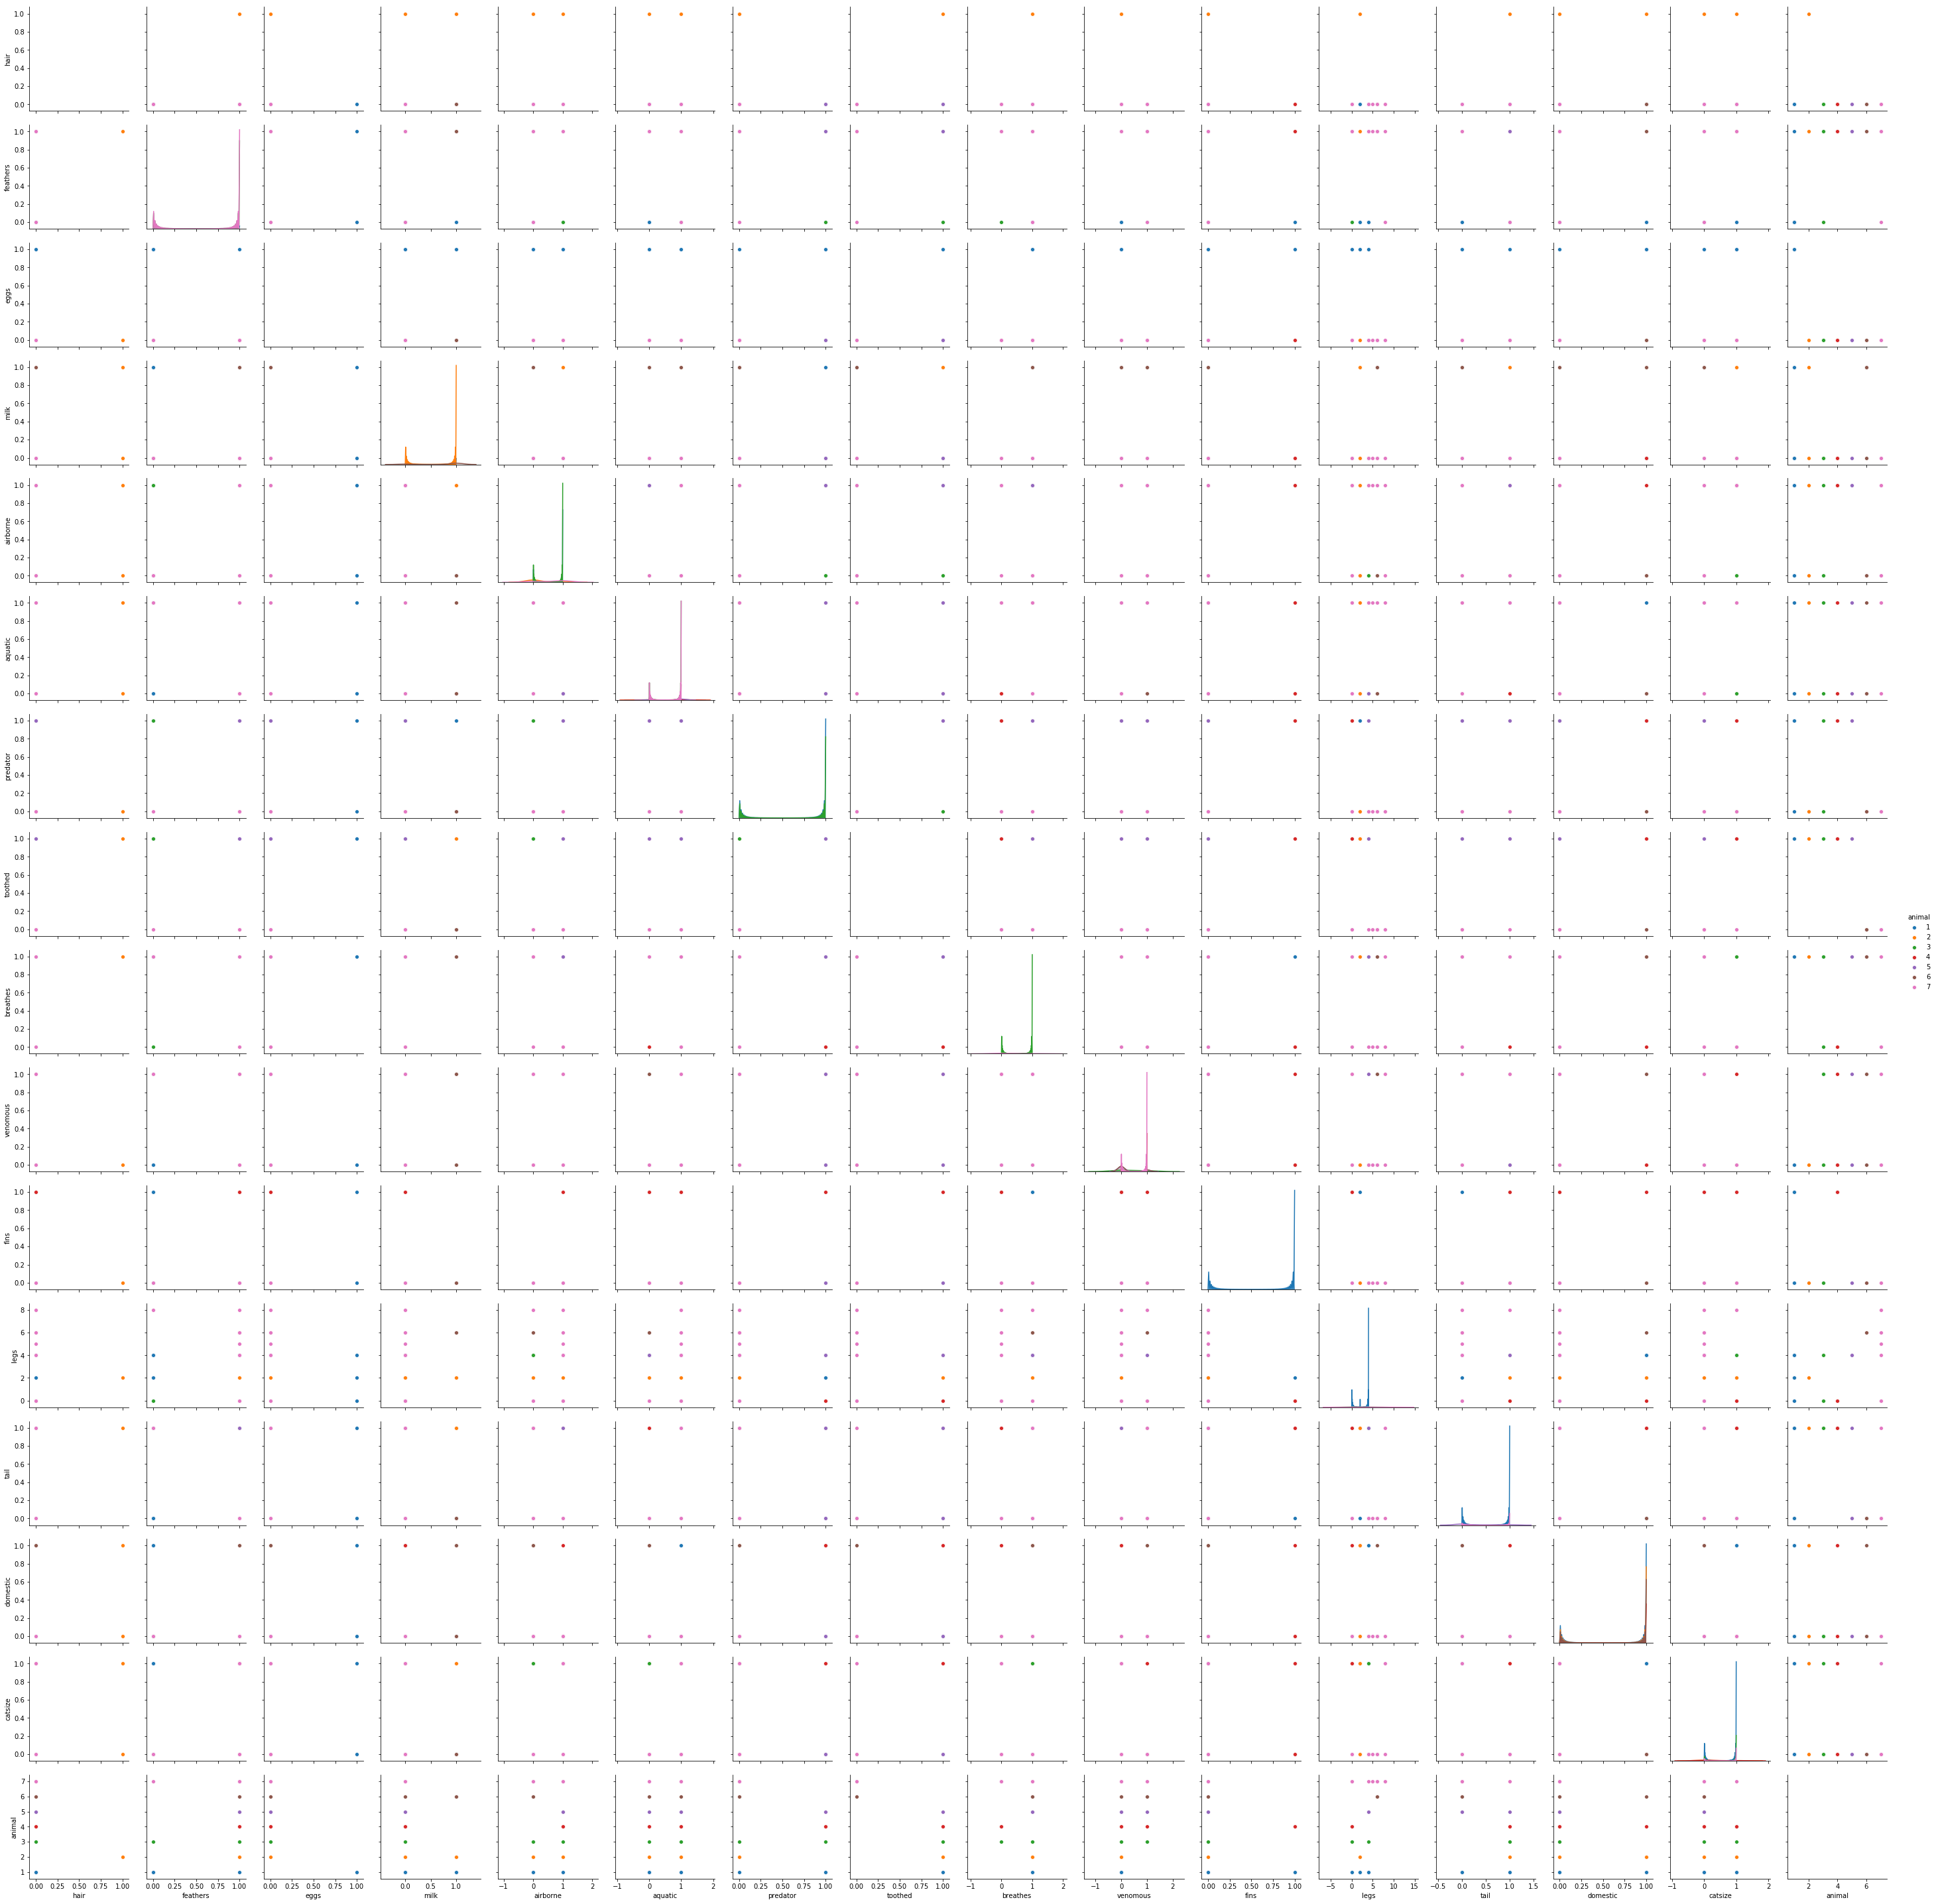

In [16]:
df = df.drop(df.columns[[0]], axis=1)

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='animal')
plt.show()

In [20]:
dataset = df.values
X = dataset[:, 0: -1]
Y_obj = dataset[:, -1]

In [23]:
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [24]:
Y

array([0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 1, 3, 6, 6, 6, 1, 0, 3, 0, 1, 1,
       0, 1, 5, 4, 4, 0, 0, 0, 5, 0, 0, 1, 3, 0, 0, 1, 3, 5, 5, 1, 5, 1,
       0, 0, 6, 0, 0, 0, 0, 5, 4, 6, 0, 0, 1, 1, 1, 1, 3, 3, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 6, 3, 0, 0, 2, 6, 1, 1, 2, 6, 3, 1, 0, 6, 3, 1,
       5, 4, 2, 2, 3, 0, 0, 1, 0, 5, 0, 6, 1])

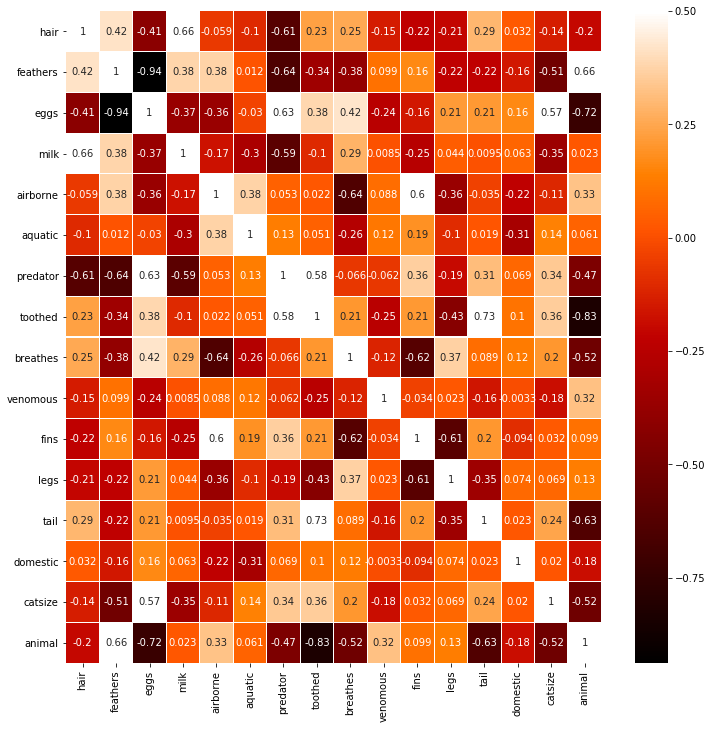

In [26]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()

In [27]:
import tensorflow as tf
import os
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold

Using TensorFlow backend.


In [28]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [30]:
Y_encoded = np_utils.to_categorical(Y)

In [31]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.3, random_state=seed)

In [34]:
Y_train.shape

(70, 7)

In [36]:
model = Sequential()
model.add(Dense(30, input_dim=15, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=2000, batch_size=500,
         callbacks=[early_stopping_callback])


Train on 56 samples, validate on 14 samples
Epoch 1/2000
56/56 [==============================] - 0s 9ms/step - loss: 2.0826 - acc: 0.1071 - val_loss: 2.1405 - val_acc: 0.0000e+00
Epoch 2/2000
56/56 [==============================] - 0s 55us/step - loss: 2.0624 - acc: 0.1071 - val_loss: 2.1103 - val_acc: 0.0000e+00
Epoch 3/2000
56/56 [==============================] - 0s 87us/step - loss: 2.0427 - acc: 0.1071 - val_loss: 2.0807 - val_acc: 0.0000e+00
Epoch 4/2000
56/56 [==============================] - 0s 159us/step - loss: 2.0232 - acc: 0.1071 - val_loss: 2.0517 - val_acc: 0.0000e+00
Epoch 5/2000
56/56 [==============================] - 0s 81us/step - loss: 2.0040 - acc: 0.0893 - val_loss: 2.0230 - val_acc: 0.0000e+00
Epoch 6/2000
56/56 [==============================] - 0s 85us/step - loss: 1.9852 - acc: 0.0893 - val_loss: 1.9949 - val_acc: 0.0000e+00
Epoch 7/2000
56/56 [==============================] - 0s 94us/step - loss: 1.9669 - acc: 0.0893 - val_loss: 1.9671 - val_acc: 0.0000e+

In [37]:
print("Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

31/31 [==============================] - 0s 50us/step
Accuracy: 0.9355
